# TASK - 2 MOVIE RATING PREDICTION 

### # Problem statement
- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.

### # Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

### # Import dataset

In [2]:
df = pd.read_csv('IMDb Movies India.csv.' , encoding = 'latin - 1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.columns = df.columns.str.replace(' ' , '_')

### # EDA

In [4]:
df.shape

(15509, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor_1   13892 non-null  object 
 8   Actor_2   13125 non-null  object 
 9   Actor_3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor_1      object
Actor_2      object
Actor_3      object
dtype: object

### # Data preprocesing

###### - Checking data types

In [8]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor_1      object
Actor_2      object
Actor_3      object
dtype: object

###### - Checking duplicate

In [9]:
df.duplicated().sum()

6

In [10]:
# droping duplicate values

df.drop_duplicates(inplace = True)

###### - Checking null vlaues

In [11]:
df.isna().sum()*100/len(df)

Name         0.000000
Year         3.399342
Duration    53.305812
Genre       12.100884
Rating      48.919564
Votes       48.913114
Director     3.379991
Actor_1     10.417339
Actor_2     15.358318
Actor_3     20.254144
dtype: float64

###### - Droping null values

In [12]:
# Dropping name column namw colum not essential 

df.drop('Name' , axis = 1 , inplace = True)

In [13]:
# droping null values  = Year , Director , Genre

df.dropna(subset = ['Year' , 'Director' , 'Genre' ], inplace = True) 

In [14]:
# replace () from name

df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

### - treting null values  

###### Year

In [15]:
# Year

# Removing () from year 
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)

#Converting year to numeric column
df['Year'] = pd.to_numeric(df['Year'])


###### Duration

In [16]:
# convt min
df.Duration.replace('min' , '',regex = True , inplace = True)

# convt from obj to numeric
df['Duration'] = pd.to_numeric(df['Duration'])  

# filling null value with mean
df['Duration'].fillna(df['Duration'].mean() , inplace = True)

###### Rating

In [17]:
df['Rating'].fillna(df['Rating'].mean() , inplace = True)

###### Votes

In [18]:
# convert obj to numeric
df['Votes']=pd.to_numeric(df['Votes'] , errors = 'coerce')

# filling null values
df['Votes'].fillna(df['Votes'].mean() , inplace = True)

###### Actors 

In [19]:
# assign var act_col for all actors
act_col = ['Actor_1' , 'Actor_2' , 'Actor_3']

In [20]:
# filling null values

def act(data) :
    df[data].fillna(df[data].mode()[0] , inplace = True)
    
for i in act_col :
    act(i)

### Target encoding

In [21]:
df.head(2)

,Year,Duration,Genre,Rating,Votes,Director,Actor_1,Actor_2,Actor_3
1,2019,109.0,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,2021,90.0,"Drama, Musical",5.839196,122.631889,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [22]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor_1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor_2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor_3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

df.drop(['Genre','Director' , 'Actor_1' , 'Actor_2' , 'Actor_3'] , axis = 1 , inplace = True)

In [23]:
df.head(2)

,Year,Duration,Rating,Votes,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109.0,7.000000,8.000000,6.082378,7.000000,6.850000,7.000000,7.000000
2,2021,90.0,5.839196,122.631889,6.325435,5.839196,6.419598,6.846399,5.839196


### Data visualization

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
plt.figure(figsize = (12,10) , dpi = 100)
for i , j in enumerate(df):
    plt.subplot(4,4 , i+1)
    plt.boxplot(df[j])
    plt.title(j)
    plt.tight_layout()
    

### Treating Outliers

In [26]:
# Iqr method 

q1 = df.quantile(0.25) 
q3 = df.quantile(0.75)

IQR = q3 - q1

ul = q3 + 1.5 * IQR
ll = q1 - 1.5 * IQR

df_new = np.where(df <= ll ,ll , np.where(df >=ul , ul , df))

In [27]:
df_new = pd.DataFrame(df_new , columns = df.columns)

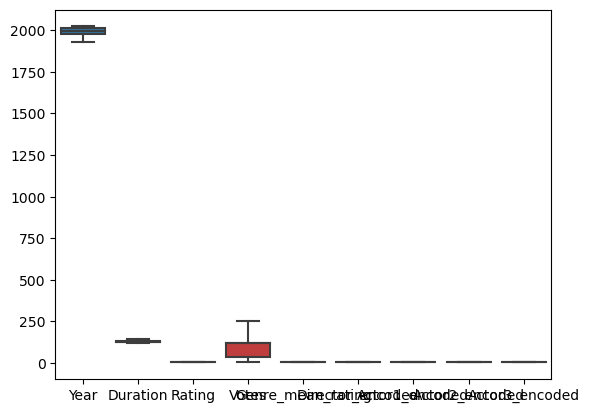

In [28]:
sns.boxplot(df_new)
plt.show()

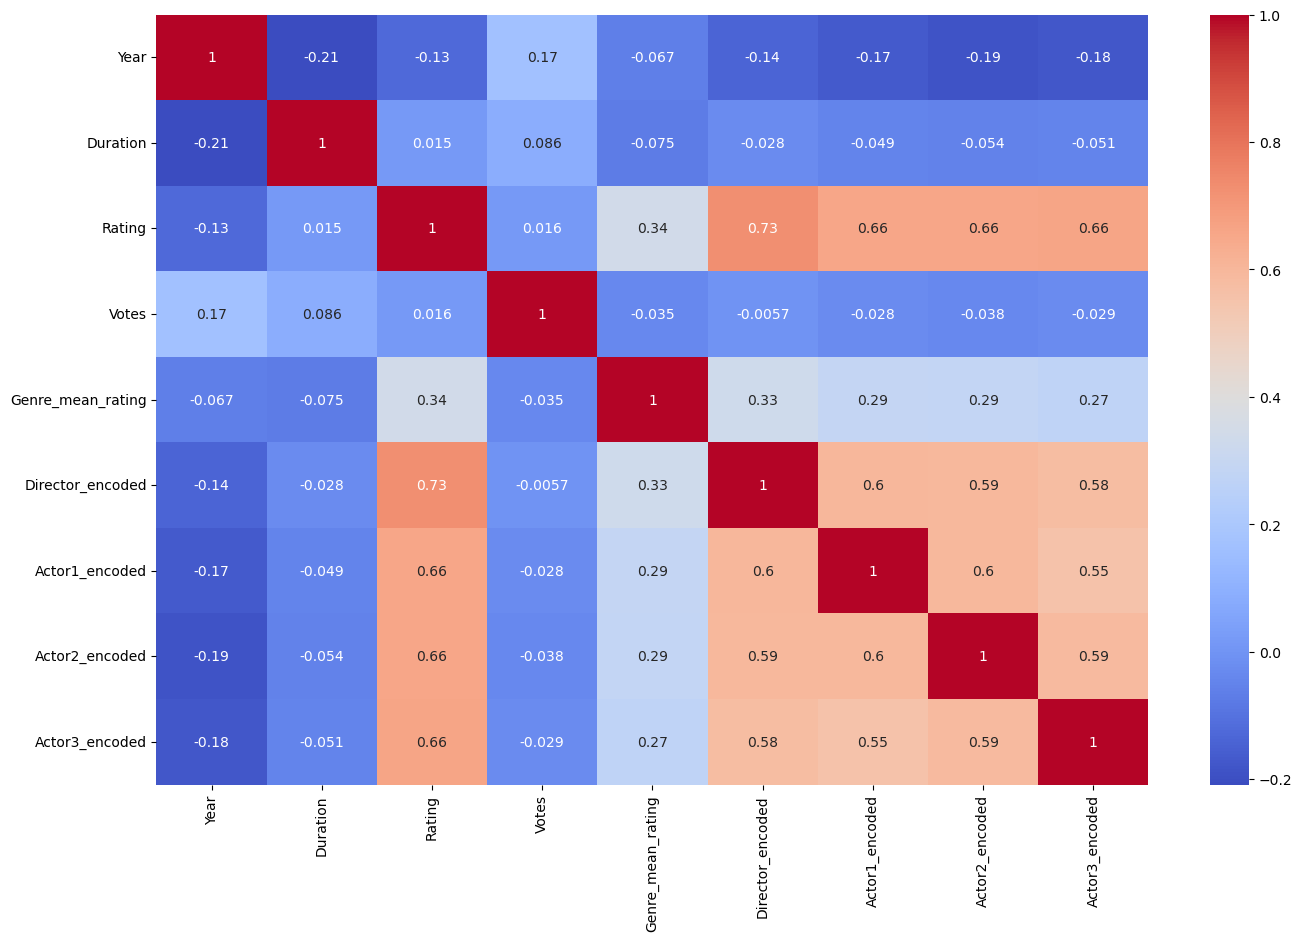

In [29]:
plt.figure(figsize = (16,10))
sns.heatmap(df_new.corr() , annot = True , cmap = 'coolwarm')
plt.show()

### Extracting features and target

In [52]:
x = df_new.drop('Rating' , axis = 1)   # features 

y= df_new['Rating']          # target

### Splting into train and test

In [53]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = 0.2 , random_state = 51)

### Model training using linear regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train , y_train)

RandomForestRegressor()

### Model evaluation

In [61]:
y_pred = rf.predict(x_test)
y_pred

array([6.55439196, 6.20923118, 6.3875    , ..., 6.88717588, 7.3495    ,
       5.29006784])

In [63]:
from sklearn.metrics import r2_score , classification_report

print(r2_score(y_test , y_pred))

0.7245603589839369


In [64]:
# add constant
x_train_sm = sm.add_constant(x_train)

# traing model using ols method
model = sm.OLS(y_train , x_train_sm).fit()

# model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     2710.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:20:45   Log-Likelihood:                -6226.7
No. Observations:               10124   AIC:                         1.247e+04
Df Residuals:                   10115   BIC:                         1.254e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.0718      0.480    -14.723      0.000      -8.013      -6.130
Year                  0.0019      0.000      8.568      0.000       0.001       0.002
Duration              0.0075      0.001     12.651      0.000       0.006       0.009
Votes                 0.0003    6.8e-05      4.145      0.000       0.000       0.000
Genre_mean_rating     0.1337      0.014      9.465      0.000       0.106       0.161
Director_encoded      0.4208      0.009     45.479      0.000       0.403       0.439
Actor1_encoded        0.2592      0.011     24.281      0.000       0.238       0.280
Actor2_encoded        0.2651      0.011     24.331      0.000       0.244       0.286
Actor3_encoded        0.3296      0.011     30.536      0.000       0.308       0.351
==============================================================================
Omnibus:                      572.798   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1423.198
Skew:                           0.334   Prob(JB):                    9.05e-310
Kurtosis:                       4.711   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model testing

In [42]:
data = {'Year': [2016], 'Duration': [121],'Votes': [58] , 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df1 = pd.DataFrame(data)
df1

,Year,Duration,Votes,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2016,121,58,4.5,5.8,5.9,5.9,5.9


In [43]:
pred = rf.predict(df1)
print(pred)

[6.02328392]
